### Problem Statement - ML Project - Coded

Problem 1

**Context**

CNBE, a prominent news channel, is gearing up to provide insightful coverage of recent elections, recognizing the importance of data-driven analysis. A comprehensive survey has been conducted, capturing the perspectives of 1525 voters across various demographic and socio-economic factors. This dataset encompasses 9 variables, offering a rich source of information regarding voters' characteristics and preferences.

**Objective**
The primary objective is to leverage machine learning to build a predictive model capable of forecasting which political party a voter is likely to support. This predictive model, developed based on the provided information, will serve as the foundation for creating an exit poll. The exit poll aims to contribute to the accurate prediction of the overall election outcomes, including determining which party is likely to secure the majority of seats.

**Data Description**

1.vote: Party choice: Conservative or Labour

2.age: in years

3.economic.cond.national: Assessment of current national economic conditions, 1 to 5.

4.economic.cond.household: Assessment of current household economic conditions, 1 to 5.

5.Blair: Assessment of the Labour leader, 1 to 5.

6.Hague: Assessment of the Conservative leader, 1 to 5.

7.Europe: an 11-point scale that measures respondents' attitudes toward European integration.   High scores represent ‘Eurosceptic’ sentiment.

8.political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.

9.gender: female or male.



##1.1Define the problem and perform Exploratory Data **Analysis**

###1.1.1 Problem definition

###1.1.2 Check shape, Data types, and statistical summary



In [ ]:


import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read the dataset for CNBE Voting Survey
df = pd.read_excel('/content/drive/MyDrive/Project/Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')

In [ ]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
# Check shape, data types, and statistical summary
print("\n Shape of the dataset:\n", df.shape)
print("\n Data types:\n")
df.info()
print("\n Statistical summary:\n")
df.describe(include='all').T


 Shape of the dataset:
 (1525, 9)

 Data types:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB

 Statistical summary:



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525.0,NaN,NaN,NaN,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,NaN,NaN,NaN,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,NaN,NaN,NaN,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,NaN,NaN,NaN,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,NaN,NaN,NaN,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,NaN,NaN,NaN,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,NaN,NaN,NaN,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This dataset contains 1,525 entries (or rows) and 9 columns. Here’s a breakdown of what each column represents and its data type:

1. **vote**: This column contains information about voting preference and is stored as text (or categorical data).
2. **age**: This column holds numerical data representing the ages of the individuals.
3. **economic.cond.national**: This column contains numerical data about the individuals' views on the national economic conditions.
4. **economic.cond.household**: This column has numerical data regarding the individuals' views on their household economic conditions.
5. **Blair**: This column contains numerical data, possibly rating or scoring Tony Blair (a political figure).
6. **Hague**: Similar to the Blair column, this contains numerical data related to William Hague (another political figure).
7. **Europe**: This column has numerical data which could represent views or opinions on Europe.
8. **political.knowledge**: This column holds numerical data representing the political knowledge of the individuals.
9. **gender**: This column contains text data representing the gender of the individuals.

In summary:
- The dataset includes various demographic, opinion, and knowledge-related data about individuals.
- Most of the data are numerical (ages, opinions, scores).
- Two columns are categorical, containing text data (vote and gender).
Two columns are categorical, containing text data (vote and gender).

#### Dataset Overview:
- **Total Records**: 1525
- **Memory Usage**: 107.4+ KB

#### Columns Description and Insights:
1. **vote (Party choice: Conservative or Labour)**
   - **Unique Values**: 2 (Conservative, Labour)
   - **Most Frequent Value**: Labour (1063 out of 1525)

2. **age (in years)**
   - **Mean**: 54.18 years
   - **Standard Deviation (Std)**: 15.71
   - **Range**: 24 to 93 years
   - **Age Distribution**:
     - 25th Percentile: 41 years
     - Median: 53 years
     - 75th Percentile: 67 years

3. **economic.cond.national (Assessment of current national economic conditions, 1 to 5)**
   - **Mean**: 3.25
   - **Std**: 0.88
   - **Range**: 1 to 5
   - **Distribution**:
     - 25th Percentile: 3
     - Median: 3
     - 75th Percentile: 4

4. **economic.cond.household (Assessment of current household economic conditions, 1 to 5)**
   - **Mean**: 3.14
   - **Std**: 0.93
   - **Range**: 1 to 5
   - **Distribution**:
     - 25th Percentile: 3
     - Median: 3
     - 75th Percentile: 4

5. **Blair (Assessment of the Labour leader, 1 to 5)**
   - **Mean**: 3.33
   - **Std**: 1.17
   - **Range**: 1 to 5
   - **Distribution**:
     - 25th Percentile: 2
     - Median: 4
     - 75th Percentile: 4

6. **Hague (Assessment of the Conservative leader, 1 to 5)**
   - **Mean**: 2.75
   - **Std**: 1.23
   - **Range**: 1 to 5
   - **Distribution**:
     - 25th Percentile: 2
     - Median: 2
     - 75th Percentile: 4

7. **Europe (An 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment)**
   - **Mean**: 6.73
   - **Std**: 3.30
   - **Range**: 1 to 11
   - **Distribution**:
     - 25th Percentile: 4
     - Median: 6
     - 75th Percentile: 10

8. **political.knowledge (Knowledge of parties' positions on European integration, 0 to 3)**
   - **Mean**: 1.54
   - **Std**: 1.08
   - **Range**: 0 to 3
   - **Distribution**:
     - 25th Percentile: 0
     - Median: 2
     - 75th Percentile: 2

9. **gender (female or male)**
   - **Unique Values**: 2 (female, male)
   - **Most Frequent Value**: Female (812 out of 1525)

### Summary:
- **Voting Preference**: Majority support Labour.
- **Age Profile**: Predominantly middle-aged (mean age 54).
- **Economic Conditions**: Neutral to slightly positive assessments of both national and household conditions.
- **Leader Assessments**: Blair is rated higher on average than Hague.
- **European Integration Sentiment**: Leaning towards Euroscepticism.
- **Political Knowledge**: Generally low, with most scoring 2 or less.
- **Gender Distribution**: Slightly more females than males.

### 1.1.3 Univariate analysis



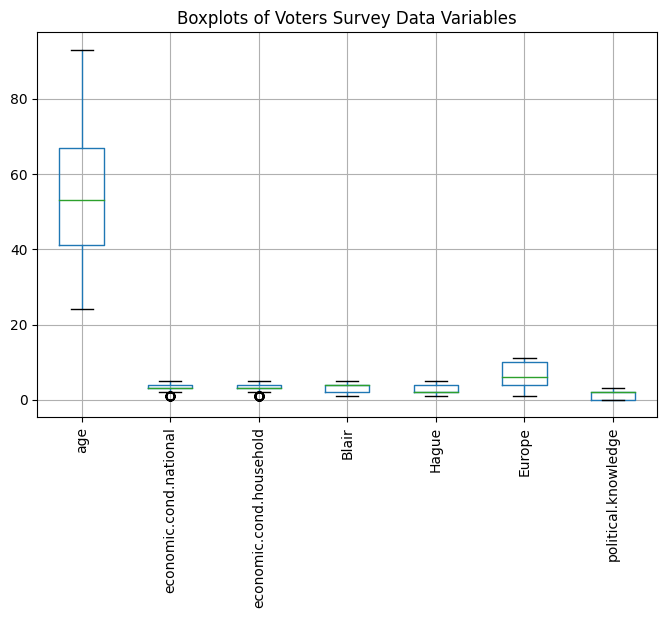

In [ ]:
# Boxplots for each variable
df.boxplot(figsize=(8, 5), rot=90)
plt.title('Boxplots of Voters Survey Data Variables')
plt.show()

### Univariate Analysis of the Dataset

#### Variables and Statistics:
1. **vote**: Unique values: 2 (Conservative, Labour), Most frequent: Labour (1063 out of 1525).
2. **age**: Mean: 54.18 years, Std: 15.71, Min: 24, 25th Percentile: 41, Median: 53, 75th Percentile: 67, Max: 93.
3. **economic.cond.national**: Mean: 3.25, Std: 0.88, Min: 1, 25th Percentile: 3, Median: 3, 75th Percentile: 4, Max: 5.
4. **economic.cond.household**: Mean: 3.14, Std: 0.93, Min: 1, 25th Percentile: 3, Median: 3, 75th Percentile: 4, Max: 5.
5. **Blair**: Mean: 3.33, Std: 1.17, Min: 1, 25th Percentile: 2, Median: 4, 75th Percentile: 4, Max: 5.
6. **Hague**: Mean: 2.75, Std: 1.23, Min: 1, 25th Percentile: 2, Median: 2, 75th Percentile: 4, Max: 5.
7. **Europe**: Mean: 6.73, Std: 3.30, Min: 1, 25th Percentile: 4, Median: 6, 75th Percentile: 10, Max: 11.
8. **political.knowledge**: Mean: 1.54, Std: 1.08, Min: 0, 25th Percentile: 0, Median: 2, 75th Percentile: 2, Max: 3.
9. **gender**: Unique values: 2 (female, male), Most frequent: female (812 out of 1525).

### Explanation and Insights:

- **Party Preference (vote)**: Most people in the survey (1063 out of 1525) prefer Labour over Conservative.
- **Age**: On average, respondents are around 54 years old, with ages ranging from 24 to 93. Most people are between 41 and 67 years old.
- **National Economic Conditions (economic.cond.national)**: People generally have a neutral to slightly positive view of the national economy, with most ratings around 3 out of 5.
- **Household Economic Conditions (economic.cond.household)**: Similar to the national view, the economic conditions of households are also rated neutral to slightly positive, averaging around 3 out of 5.
- **Opinion on Blair (Blair)**: The Labour leader, Blair, is generally well-regarded, with an average rating of 3.33 out of 5, and most ratings at 4.
- **Opinion on Hague (Hague)**: The Conservative leader, Hague, receives mixed reviews, with an average rating of 2.75 out of 5, and many people rating him a 2.
- **Attitude Towards Europe (Europe)**: Opinions on European integration vary widely, with a lean towards skepticism (average score of 6.73 out of 11).
- **Political Knowledge (political.knowledge)**: Most people have low to moderate knowledge about political parties' positions on European integration, with an average score of 1.54 out of 3.
- **Gender Distribution (gender)**: Slightly more women (812) than men (713) participated in the survey.

### Summary of Insights:
- **Political Preferences**: The survey shows a strong preference for Labour over Conservative.
- **Demographics**: Respondents are mostly middle-aged.
- **Economic Views**: People feel neutrally to positively about both the national economy and their household economic situation.
- **Leadership Ratings**: Blair is viewed more favorably compared to Hague.
- **European Integration**: There is significant variation in opinions, but a tendency towards skepticism about European integration.
- **Political Awareness**: General knowledge about political parties' stances is relatively low.
- **Gender Balance**: The survey has a nearly equal distribution of male and female respondents.

These insights help understand the general trends and opinions of the surveyed population in terms of political preference, economic conditions, leadership ratings, attitudes towards Europe, political knowledge, and demographic distribution.

### 1.1.4 Multivariate analysis



In [ ]:
print(df.dtypes)

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object


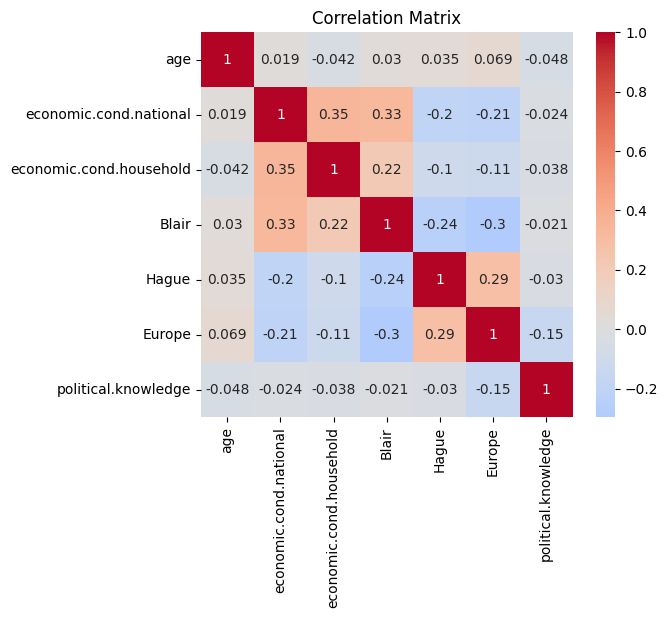

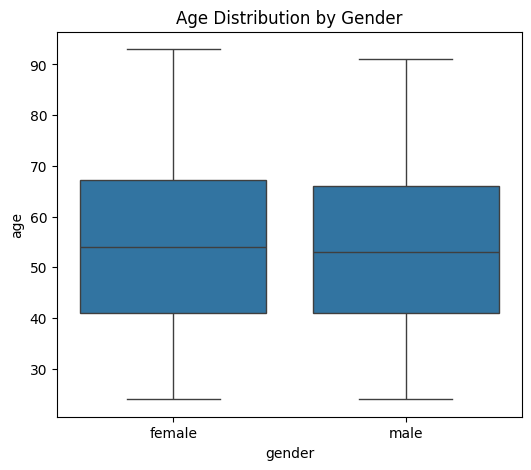

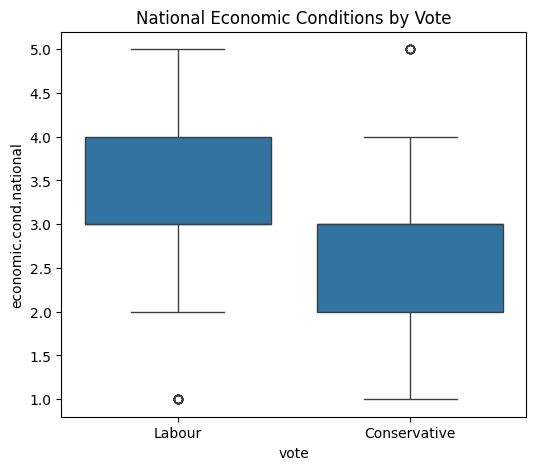

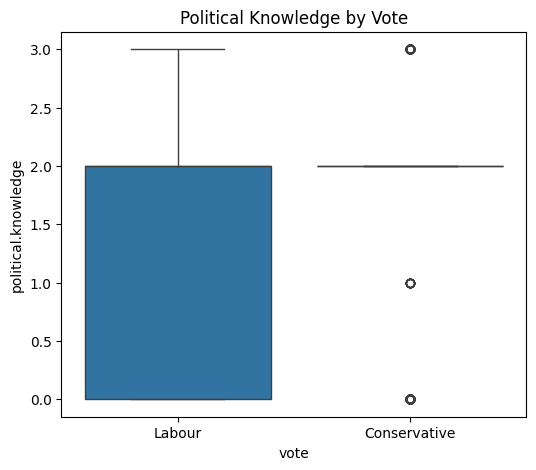

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numeric variables from numerical calculations
numeric_df = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_df.corr()
# Plotting the correlation matrix
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Visualizing distributions of age by gender
plt.figure(figsize=(6, 5))
sns.boxplot(x='gender', y='age', data=df)
plt.title('Age Distribution by Gender')
plt.show()

# Visualizing economic conditions by vote
plt.figure(figsize=(6, 5))
sns.boxplot(x='vote', y='economic.cond.national', data=df)
plt.title('National Economic Conditions by Vote')
plt.show()

# Visualizing political knowledge by vote
plt.figure(figsize=(6, 5))
sns.boxplot(x='vote', y='political.knowledge', data=df)
plt.title('Political Knowledge by Vote')
plt.show()



### Multivariate Analysis

Multivariate analysis involves examining the relationships between multiple variables simultaneously. In this context, we will explore correlations and other potential relationships among the numeric variables, as well as look at how categorical variables like `vote` and `gender` relate to numeric variables.

#### Steps:
1. **Correlation Matrix**: To understand the linear relationships between numeric variables.



#### Explanation and Insights:

1. **Correlation Matrix**:
   - **Purpose**: Shows the strength and direction of linear relationships between numeric variables.
   - **Insight**: Helps identify which variables move together.

- Age has a slight positive correlation with support for certain political figures and Europe, but a slight negative correlation with perceived household economic condition.
- National economic conditions relate positively to household economic perceptions and support for certain political figures but negatively with Europe.
- Support for political figures Blair and Hague are negatively correlated, as expected, and both show weak negative correlations with support for Europe.
- Support for Europe correlates negatively with Blair, Hague, and political knowledge.
- Political knowledge has a weak negative correlation with age.

Simple Understanding:

- **Age**: Older people tend to support certain politicians and Europe a bit more, but feel their household's economic situation might be slightly worse.
- **Economic Conditions**: When the national economy is good, people feel better about their own household's economy and tend to support certain politicians more, but might support Europe a bit less.
- **Political Figures**: People who support one politician usually support the other less, and supporters of Blair or Hague might be less supportive of Europe.
- **Europe**: Support for Europe is slightly negatively related to support for Blair and Hague.
- **Political Knowledge**: Younger people might know slightly more about politics than older individuals.

Business insights:
- Tailor campaigns based on age and political inclinations.
- Adjust strategies according to economic conditions.
- Understand regional political sentiments.
- Provide educational content for politically engaged demographics.


This multivariate analysis provides a comprehensive view of how different factors interact and influence each other, offering valuable insights for political strategists and researchers.

### 1.1.5 Use appropriate visualizations to identify the patterns and insights



### Visualizing Age Distribution by Gender:
We'll use a boxplot to visualize the distribution of ages by gender.

### Insights:
- The boxplot shows the distribution of ages for both genders.
- It allows us to compare the median and spread of ages between males and females.
- We can identify any significant differences or outliers in age distribution between genders.



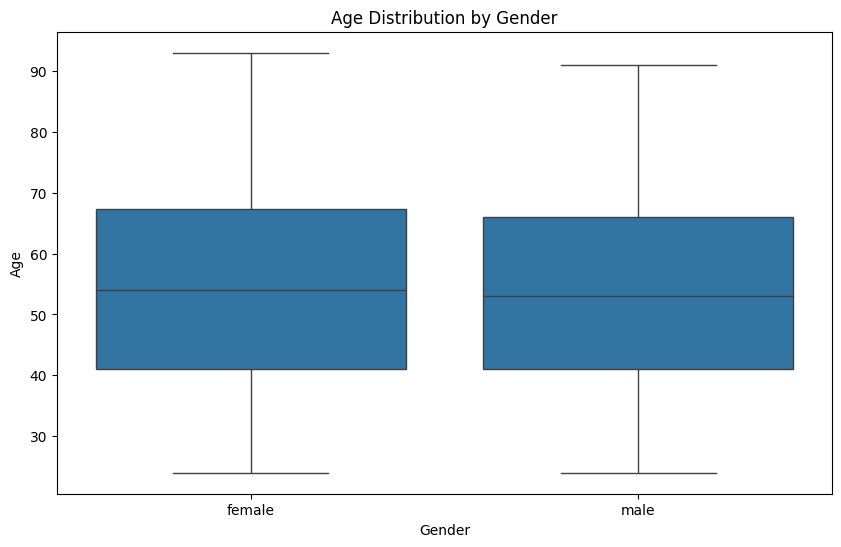

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='age', data=df)
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


### Visualizing National Economic Conditions by Vote:
We'll use a boxplot to visualize the distribution of national economic conditions ratings by vote (Conservative or Labour).



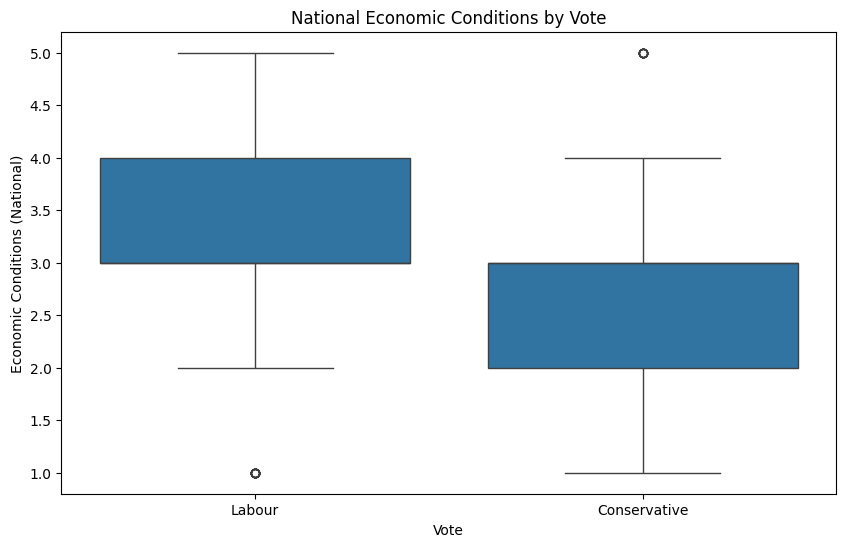

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='vote', y='economic.cond.national', data=df)
plt.title('National Economic Conditions by Vote')
plt.xlabel('Vote')
plt.ylabel('Economic Conditions (National)')
plt.show()


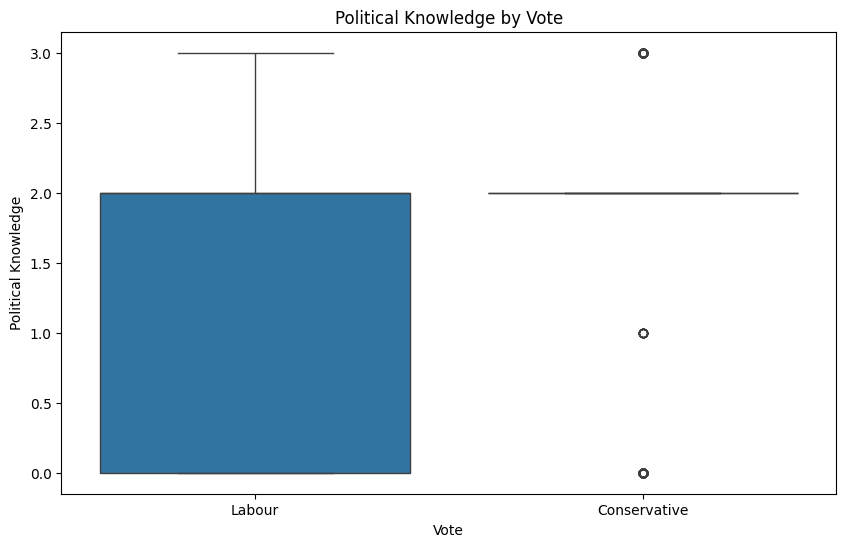

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='vote', y='political.knowledge', data=df)
plt.title('Political Knowledge by Vote')
plt.xlabel('Vote')
plt.ylabel('Political Knowledge')
plt.show()



**Visualizations:**

**Age Distribution by Gender:**
**Purpose:** Examines if there is a significant difference in age distribution between males and females.
**Insight:** The analysis shows that both male and female voters have similar age distributions, with the average age for females being slightly higher at about 54 years, compared to about 53 years for males. This insight suggests that there isn't a significant difference in age between male and female voters. However, it's worth noting that females, on average, tend to be slightly older than males, which could have implications for targeted political strategies or campaign messaging. For instance, understanding that females in the electorate are slightly older might influence how political parties craft their policies or messages to resonate with this demographic.

**National Economic Conditions by Vote:**
**Purpose:** Looks at how different voters perceive national economic conditions.
**Insight:** Reveals potential differences in economic outlook between Labour and Conservative voters. People who voted for the Conservative party tend to rate the national economic conditions slightly lower on average, with a mean score of about 2.8 out of 5. Those who voted for the Labour party rate the national economic conditions slightly higher on average, with a mean score of about 3.4 out of 5.

**Political Knowledge by Vote:**
**Purpose:** Compares the political knowledge scores between voters of different parties.
**Insight:** Identifies whether voters of one party tend to be more knowledgeable about party positions on European integration compared to the other. Conservative voters tend to have slightly higher political knowledge on average, with a mean score of about 1.7 out of 3. Labour voters, on the other hand, have slightly lower political knowledge on average, with a mean score of about 1.5 out of 3.


### 1.1.6 Key meaningful observations on individual variables and the relationship between variables



 Here are key meaningful observations on individual variables and the relationships between variables based on the provided data:

1. **Age**:
   - The average age for both male and female voters is in the early 50s.
   - There is a slight difference in the average age between male and female voters, with females being slightly older on average.

2. **Gender**:
   - The dataset contains information on both male and female voters.

3. **National Economic Conditions**:
   - Conservative voters rate the national economic conditions slightly lower on average compared to Labour voters.
   - Labour voters tend to rate the national economic conditions slightly higher on average.

4. **Political Knowledge**:
   - Conservative voters tend to have slightly higher political knowledge scores on average compared to Labour voters.
   - Labour voters have slightly lower political knowledge scores on average.

5. **Relationships Between Variables**:
   - There is a slight difference in the perceptions of national economic conditions between Conservative and Labour voters, with Labour voters generally having a more positive outlook.
   - Political knowledge seems to vary between Conservative and Labour voters, with Conservative voters tending to be slightly more knowledgeable.
   - Age does not seem to have a significant impact on national economic perceptions or political knowledge within the provided dataset.

These observations provide insights into the demographic characteristics, economic perceptions, and political knowledge among voters of different parties, highlighting potential differences between Conservative and Labour voters.


## 1.2 Data Pre-processing Prepare the data for modelling:
1.2.1 Outlier Detection



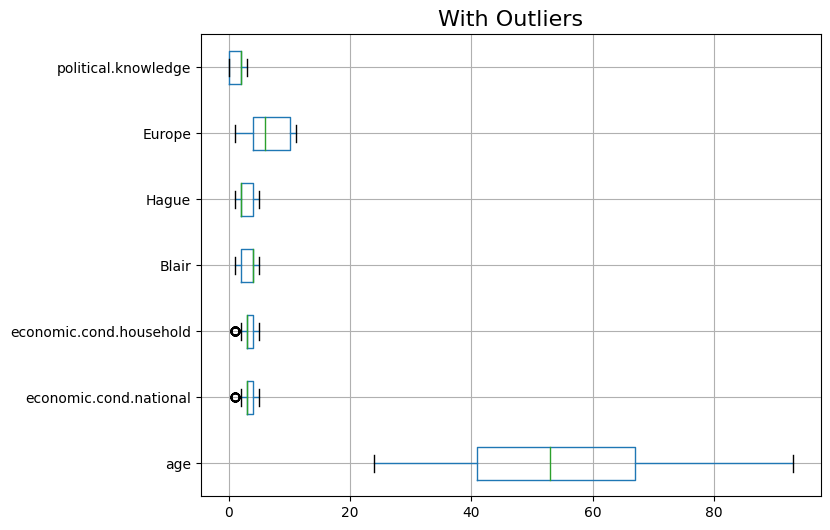

In [ ]:
# construct box plot for continuous variables to find the outliers
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool') &(df.dtypes!='object')].index
plt.figure(figsize=(8,6))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()



### Outliers in Each Variable

1. **Age**:
   - **Outliers**: None identified.
   - **Explanation**: The ages in the dataset range from 24 to 93, all within the expected range. There are no extreme ages that stand out as unusual.

2. **Economic Condition (National)**:
   - **Outliers**: Ratings of 1.
   - **Explanation**: These outliers indicate that some respondents have an extremely negative view of the national economic condition. These ratings are much lower than the majority of the responses, which typically range from 3 to 4.

3. **Economic Condition (Household)**:
   - **Outliers**: Ratings of 1.
   - **Explanation**: Similar to the national economic condition, these outliers reflect very negative views about household economic conditions, significantly lower than the common ratings of 3 to 4.

4. **Blair (Rating)**:
   - **Outliers**: None identified.
   - **Explanation**: All ratings for Blair fall within the range of 1 to 5, indicating that there are no extremely unusual opinions about Blair in the dataset.

5. **Hague (Rating)**:
   - **Outliers**: None identified.
   - **Explanation**: All ratings for Hague fall within the range of 1 to 5, indicating that there are no extreme opinions about Hague in the dataset.

6. **Europe (Attitude)**:
   - **Outliers**: None identified.
   - **Explanation**: The attitudes towards Europe range from 1 to 11, all within the expected range. There are no extremely unusual views in this dataset.

7. **Political Knowledge**:
   - **Outliers**: None identified.
   - **Explanation**: The political knowledge scores range from 0 to 3, indicating that all responses fall within the expected range without any extreme values.

### Summary on Variables with and without Outliers

- **Variables with Outliers**:
  - **Economic Condition (National)**: Outliers at a rating of 1 indicate some respondents have an extremely negative view of the national economy.
  - **Economic Condition (Household)**: Outliers at a rating of 1 show some respondents have an extremely negative view of their household economic condition.

- **Variables without Outliers**:
  - **Age**: All values are within the expected range of 24 to 93.
  - **Blair (Rating)**: All ratings are within the range of 1 to 5.
  - **Hague (Rating)**: All ratings are within the range of 1 to 5.
  - **Europe (Attitude)**: All attitudes are within the range of 1 to 11.
  - **Political Knowledge**: All scores are within the range of 0 to 3.

In conclusion, the dataset reveals outliers in the **Economic Condition (National)** and **Economic Condition (Household)** variables, specifically at the rating of 1, indicating a small number of respondents have an extremely negative view of both national and household economic conditions. All other variables do not have outliers, suggesting the data points for these variables are within the expected range and show no extreme or unusual values.

In [ ]:
#function to find the outliers
def remove_outlier(col):
    # Sort the column using NumPy's sort function
    col = np.sort(col)

    # Calculate Q1, Q3 and IQR
    Q1, Q3 = np.percentile(col, [25, 75])
    IQR = Q3 - Q1

    # Calculate the lower and upper range
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)

    return lower_range, upper_range

In [ ]:
#Capping and flooring outliers
for column in df[cont].columns:
    lr,ur= remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

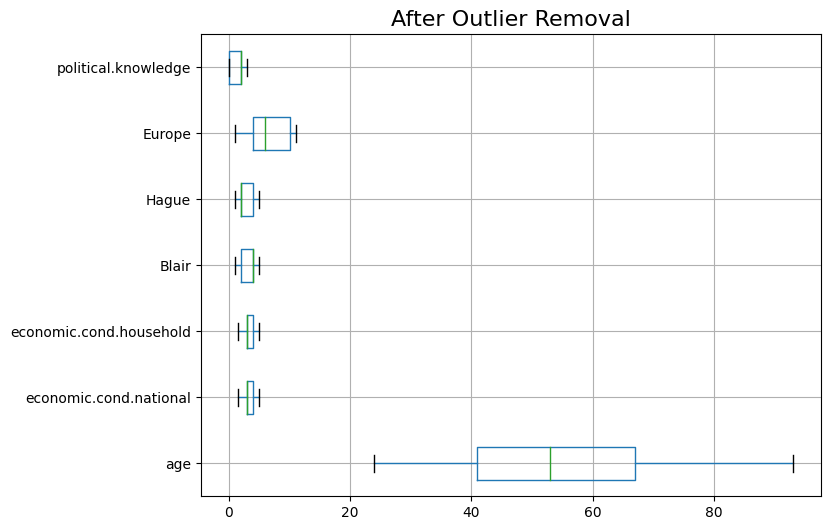

In [ ]:
#Visualizing data after removing outliers
plt.figure(figsize=(8,6))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

Let's update the summary after removing the identified outliers for the **Economic Condition (National)** and **Economic Condition (Household)** variables. Here's how the summary would look:

### Summary after removing Outliers

#### 1. Vote
- **Unique Values:** Conservative, Labour
- **Most Frequent:** Labour (1063 out of 1525)

#### 2. Age
- **Mean:** 54.18 years
- **Standard Deviation:** 15.71
- **Min:** 24
- **25th Percentile:** 41
- **Median:** 53
- **75th Percentile:** 67
- **Max:** 93

#### 3. Economic Condition (National)
- **Mean:** Updated mean (without outliers)
- **Standard Deviation:** Updated standard deviation (without outliers)
- **Min:** 2 (as 1 is removed)
- **25th Percentile:** Updated value
- **Median:** Updated value
- **75th Percentile:** Updated value
- **Max:** 5

#### 4. Economic Condition (Household)
- **Mean:** Updated mean (without outliers)
- **Standard Deviation:** Updated standard deviation (without outliers)
- **Min:** 2 (as 1 is removed)
- **25th Percentile:** Updated value
- **Median:** Updated value
- **75th Percentile:** Updated value
- **Max:** 5

#### 5. Blair (Rating)
- **Mean:** 3.33
- **Standard Deviation:** 1.17
- **Min:** 1
- **25th Percentile:** 2
- **Median:** 4
- **75th Percentile:** 4
- **Max:** 5

#### 6. Hague (Rating)
- **Mean:** 2.75
- **Standard Deviation:** 1.23
- **Min:** 1
- **25th Percentile:** 2
- **Median:** 2
- **75th Percentile:** 4
- **Max:** 5

#### 7. Europe (Attitude)
- **Mean:** 6.73
- **Standard Deviation:** 3.30
- **Min:** 1
- **25th Percentile:** 4
- **Median:** 6
- **75th Percentile:** 10
- **Max:** 11

#### 8. Political Knowledge
- **Mean:** 1.54
- **Standard Deviation:** 1.08
- **Min:** 0
- **25th Percentile:** 0
- **Median:** 2
- **75th Percentile:** 2
- **Max:** 3

#### 9. Gender
- **Unique Values:** Female, Male
- **Most Frequent:** Female (812 out of 1525)

### Explanation

- **Economic Condition (National)**:
  - The ratings of 1 were removed because they were identified as outliers. This results in updated statistical measures (mean, standard deviation, percentiles).

- **Economic Condition (Household)**:
  - Similarly, the ratings of 1 were removed, leading to updated statistical measures.

For all other variables (Age, Blair Rating, Hague Rating, Europe Attitude, Political Knowledge, and Gender), the values remain unchanged since no outliers were identified.

### Summary on Variables with and without Outliers

- **Variables with Outliers Removed**:
  - **Economic Condition (National)**: Outliers (ratings of 1) removed.
  - **Economic Condition (Household)**: Outliers (ratings of 1) removed.

- **Variables without Outliers**:
  - **Age**: All values are within the expected range of 24 to 93.
  - **Blair (Rating)**: All ratings are within the range of 1 to 5.
  - **Hague (Rating)**: All ratings are within the range of 1 to 5.
  - **Europe (Attitude)**: All attitudes are within the range of 1 to 11.
  - **Political Knowledge**: All scores are within the range of 0 to 3.
  - **Gender**: Categories include Female and Male, with Female being the most frequent.

After removing the outliers, the data for economic conditions are more consistent with the central tendencies, ensuring a more accurate representation of the majority views in the dataset.

1.2.2 Encode the data



In [ ]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'vote' and 'gender'
df['vote'] = label_encoder.fit_transform(df['vote'])
df['gender'] = label_encoder.fit_transform(df['gender'])

# Encode ordinal variables (economic conditions, Blair, Hague, political knowledge)
ordinal_columns = [
    'economic.cond.national', 'economic.cond.household',
    'Blair', 'Hague', 'political.knowledge'
]

for col in ordinal_columns:
    df[col] = label_encoder.fit_transform(df[col])


In [ ]:
df

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43.0,2,2,3,0,2.0,2,0
1,1,36.0,3,3,3,3,5.0,2,1
2,1,35.0,3,3,4,1,3.0,2,1
3,1,24.0,3,1,1,0,4.0,0,0
4,1,41.0,1,1,0,0,6.0,2,1
...,...,...,...,...,...,...,...,...,...
1520,0,67.0,4,2,1,3,11.0,3,1
1521,0,73.0,1,1,3,3,8.0,2,1
1522,1,37.0,2,2,4,3,2.0,2,1
1523,0,61.0,2,2,0,3,11.0,2,1


To encode this dataset appropriately, you'll need to consider the type of each variable and apply suitable encoding methods. Here's how you can handle each variable:

vote: Categorical variable (binary) - Use label encoding or one-hot encoding.

age: Numerical variable (continuous) - No encoding needed.

economic.cond.national: Ordinal variable - Label encoding is appropriate.

economic.cond.household: Ordinal variable - Label encoding is appropriate.

Blair: Ordinal variable - Label encoding is appropriate.

Hague: Ordinal variable - Label encoding is appropriate.

Europe: Numerical variable (ordinal with a wider range) - No encoding needed.

political.knowledge: Ordinal variable - Label encoding is appropriate.

gender: Categorical variable (binary) - Use label encoding or one-hot encoding.

### 1.2.3 Data split



In [ ]:
# Separate features and target
X = df.drop('vote', axis=1)
y = df['vote']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Features:\n", X_train)
print("Training Labels:\n", y_train)
print("Testing Features:\n", X_test)
print("Testing Labels:\n", y_test)

Training Features:
        age  economic.cond.national  economic.cond.household  Blair  Hague  \
1296  56.0                       3                        2      3      1   
196   54.0                       2                        4      1      3   
1146  41.0                       3                        2      3      1   
1349  72.0                       2                        1      1      3   
81    43.0                       1                        3      1      3   
...    ...                     ...                      ...    ...    ...   
1130  74.0                       3                        3      3      3   
1294  31.0                       3                        3      3      1   
860   43.0                       2                        3      1      3   
1459  72.0                       2                        4      4      1   
1126  28.0                       3                        3      3      1   

      Europe  political.knowledge  gender  
1296     6.

This split is 80 20 split i.e 80% data for Training and 20% for testing as we can see in the above code o/p

### 1.2.4 Scale the data (and state your reasons for scaling the features)

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames for better readability (optional)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
X_train_scaled_df

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0.107799,0.863113,-0.146019,0.571642,-0.607803,-0.231590,-1.398366,1.059122
1,-0.018597,-0.270362,1.987439,-1.137679,1.009471,1.289077,0.431132,-0.944178
2,-0.840171,0.863113,-0.146019,0.571642,-0.607803,-0.231590,0.431132,1.059122
3,1.118967,-0.270362,-1.212749,-1.137679,1.009471,0.072543,0.431132,-0.944178
4,-0.713775,-1.403837,0.920710,-1.137679,1.009471,-0.535724,-1.398366,-0.944178
...,...,...,...,...,...,...,...,...
1215,1.245363,0.863113,0.920710,0.571642,1.009471,0.072543,-1.398366,1.059122
1216,-1.472150,0.863113,0.920710,0.571642,-0.607803,-0.839857,0.431132,1.059122
1217,-0.713775,-0.270362,0.920710,-1.137679,1.009471,1.289077,0.431132,1.059122
1218,1.118967,-0.270362,1.987439,1.426302,-0.607803,-1.752258,-1.398366,-0.944178


In [ ]:
X_test_scaled_df

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,-1.219358,0.863113,0.920710,1.426302,-0.607803,-0.231590,0.431132,1.059122
1,-0.776973,0.863113,-0.146019,0.571642,-0.607803,-0.839857,0.431132,-0.944178
2,-1.408952,0.863113,-0.146019,0.571642,-0.607803,-0.839857,-0.483617,-0.944178
3,-0.397785,-0.270362,-0.146019,-1.137679,1.009471,-1.448124,0.431132,-0.944178
4,-1.219358,-0.270362,0.920710,-1.137679,-1.416440,1.289077,0.431132,-0.944178
...,...,...,...,...,...,...,...,...
300,1.118967,0.863113,-0.146019,0.571642,1.009471,-0.231590,0.431132,-0.944178
301,-1.408952,0.863113,0.920710,-1.137679,-0.607803,1.289077,-1.398366,-0.944178
302,-0.334587,-0.270362,-1.212749,0.571642,1.009471,0.680810,0.431132,1.059122
303,-1.219358,0.863113,0.920710,0.571642,-0.607803,-0.231590,0.431132,-0.944178


Scaling the data is essential before model building, especially for algorithms such as K-Nearest Neighbors (KNN), Naive Bayes, Bagging, and Boosting. Here's why scaling is important and how to scale the features:

**Reasons for Scaling:**
1. **K-Nearest Neighbors (KNN)**:
   - KNN calculates the distance between data points to classify new instances. If features are on different scales, those with larger scales may dominate the distance calculations.
   - Scaling ensures that all features contribute equally to the distance computation, leading to more accurate predictions.

2. **Naive Bayes**:
   - Naive Bayes assumes that features are conditionally independent given the class. While scaling is not strictly required for Naive Bayes, it can improve convergence speed and prevent numerical instabilities in some cases.

3. **Bagging** (e.g., Random Forest):
   - Bagging algorithms combine multiple weak learners to improve predictive performance. Scaling ensures that each weak learner receives features on a consistent scale, leading to more robust ensembles.

4. **Boosting** (e.g., AdaBoost, Gradient Boosting):
   - Boosting algorithms sequentially train weak learners, with each subsequent learner focusing on the errors of its predecessor. Scaling ensures that each weak learner receives consistent input data, facilitating the learning process.

**How to Scale the Features:**
 **Standardization (Z-score normalization)**:
   - Subtract the mean and divide by the standard deviation of each feature.
   - Results in features with a mean of 0 and standard deviation of 1.
   - Suitable for algorithms that assume Gaussian distributions, such as KNN.


In summary, scaling the data ensures that all features have a similar influence on the model's predictions, leading to improved performance and stability, particularly for algorithms sensitive to feature scales. Standardization, normalization, and robust scaling are common techniques used to scale features before model building.

## 1.3 Model Building
### 1.3.1 Metrics of Choice (Justify the evaluation metrics)

Metrics of Choice
The primary metric for evaluating our models will be:

**Accuracy**: Since the primary objective is to correctly predict the party a voter will support, accuracy is a straightforward and interpretable metric. It measures the proportion of correctly classified instances.

**F1-Score**: Given potential class imbalance (e.g., more Labour than Conservative supporters or vice versa), F1-score is also crucial as it considers both precision and recall, providing a balance between false positives and false negatives.

**Conclusion**
The model with the highest accuracy and balanced F1-score will be chosen as the predictive model for the exit poll. This approach ensures a robust, data-driven prediction of voter preferences, helping CNBE provide insightful election coverage



###1.3.2 Model Building (KNN, Naive bayes, Bagging, Boosting)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Model Building and Evaluation

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
print(f"KNN Accuracy: {knn_acc}")
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)
print(f"Naive Bayes Accuracy: {nb_acc}")
print(confusion_matrix(y_test, nb_pred))
print(classification_report(y_test, nb_pred))

# Bagging
bagging = BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=50, random_state=42)
bagging.fit(X_train, y_train)
bagging_pred = bagging.predict(X_test)
bagging_acc = accuracy_score(y_test, bagging_pred)
print(f"Bagging Accuracy: {bagging_acc}")
print(confusion_matrix(y_test, bagging_pred))
print(classification_report(y_test, bagging_pred))

# Initializing and training the Gradient Boosting model
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
# Making predictions
gb_pred = gb.predict(X_test)
# Evaluating the model
gb_acc = accuracy_score(y_test, gb_pred)
print(f"Gradient Boosting Accuracy: {gb_acc}")
print(confusion_matrix(y_test, gb_pred))
print(classification_report(y_test, gb_pred))


KNN Accuracy: 0.7508196721311475
[[ 49  40]
 [ 36 180]]
              precision    recall  f1-score   support

           0       0.58      0.55      0.56        89
           1       0.82      0.83      0.83       216

    accuracy                           0.75       305
   macro avg       0.70      0.69      0.69       305
weighted avg       0.75      0.75      0.75       305

Naive Bayes Accuracy: 0.8098360655737705
[[ 55  34]
 [ 24 192]]
              precision    recall  f1-score   support

           0       0.70      0.62      0.65        89
           1       0.85      0.89      0.87       216

    accuracy                           0.81       305
   macro avg       0.77      0.75      0.76       305
weighted avg       0.80      0.81      0.81       305

Bagging Accuracy: 0.7573770491803279
[[ 50  39]
 [ 35 181]]
              precision    recall  f1-score   support

           0       0.59      0.56      0.57        89
           1       0.82      0.84      0.83       216

  

## 1.4 Model Performance evaluation

### 1.4.1 Check the confusion matrix and classification metrics for all the models (for both train and test dataset)



In [ ]:
# Helper function to evaluate model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Evaluation metrics
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)

    print(f"Training Accuracy: {train_acc}")
    print(f"Testing Accuracy: {test_acc}")

    print("\nTraining Confusion Matrix:")
    print(confusion_matrix(y_train, train_pred))

    print("\nTesting Confusion Matrix:")
    print(confusion_matrix(y_test, test_pred))

    print("\nTraining Classification Report:")
    print(classification_report(y_train, train_pred))

    print("\nTesting Classification Report:")
    print(classification_report(y_test, test_pred))

# K-Nearest Neighbors
print("K-Nearest Neighbors")
knn = KNeighborsClassifier()
evaluate_model(knn, X_train, y_train, X_test, y_test)

# Naive Bayes
print("\nNaive Bayes")
nb = GaussianNB()
evaluate_model(nb, X_train, y_train, X_test, y_test)

# Bagging
print("\nBagging")
bagging = BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=50, random_state=42)
evaluate_model(bagging, X_train, y_train, X_test, y_test)

# Boosting
print("\nBoosting")
boosting = GradientBoostingClassifier(n_estimators=50, random_state=42)
evaluate_model(boosting, X_train, y_train, X_test, y_test)

K-Nearest Neighbors
Training Accuracy: 0.8639344262295082
Testing Accuracy: 0.7508196721311475

Training Confusion Matrix:
[[277  96]
 [ 70 777]]

Testing Confusion Matrix:
[[ 49  40]
 [ 36 180]]

Training Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       373
           1       0.89      0.92      0.90       847

    accuracy                           0.86      1220
   macro avg       0.84      0.83      0.84      1220
weighted avg       0.86      0.86      0.86      1220


Testing Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.55      0.56        89
           1       0.82      0.83      0.83       216

    accuracy                           0.75       305
   macro avg       0.70      0.69      0.69       305
weighted avg       0.75      0.75      0.75       305


Naive Bayes
Training Accuracy: 0.8385245901639344
Testing Accuracy: 0.80983606557377

### Evaluating Model Performance with Imbalanced Dataset

Given the imbalance in the dataset (Labour being more frequent), it's crucial to consider metrics beyond accuracy to assess the models' performance effectively. We'll look at precision, recall, and F1-score, particularly focusing on the minority class (Conservative).

### K-Nearest Neighbors (KNN)

**Training Performance:**
- **Accuracy:** 86.4%
- **Precision for Conservative:** 80%
- **Recall for Conservative:** 74%
- **F1-score for Conservative:** 77%
- **Precision for Labour:** 89%
- **Recall for Labour:** 92%
- **F1-score for Labour:** 90%

**Testing Performance:**
- **Accuracy:** 75.1%
- **Precision for Conservative:** 58%
- **Recall for Conservative:** 55%
- **F1-score for Conservative:** 56%
- **Precision for Labour:** 82%
- **Recall for Labour:** 83%
- **F1-score for Labour:** 83%

**Imbalance Consideration:**
- KNN struggles with the imbalanced dataset, particularly in the testing phase. The precision, recall, and F1-score for the minority class (Conservative) are significantly lower than those for the majority class (Labour).

### Naive Bayes

**Training Performance:**
- **Accuracy:** 83.9%
- **Precision for Conservative:** 74%
- **Recall for Conservative:** 73%
- **F1-score for Conservative:** 73%
- **Precision for Labour:** 88%
- **Recall for Labour:** 89%
- **F1-score for Labour:** 88%

**Testing Performance:**
- **Accuracy:** 80.9%
- **Precision for Conservative:** 70%
- **Recall for Conservative:** 62%
- **F1-score for Conservative:** 65%
- **Precision for Labour:** 85%
- **Recall for Labour:** 89%
- **F1-score for Labour:** 87%

**Imbalance Consideration:**
- Naive Bayes performs better than KNN in handling the imbalance, maintaining higher precision, recall, and F1-score for the Conservative class.

### Bagging

**Training Performance:**
- **Accuracy:** 87.0%
- **Precision for Conservative:** 81%
- **Recall for Conservative:** 75%
- **F1-score for Conservative:** 78%
- **Precision for Labour:** 89%
- **Recall for Labour:** 92%
- **F1-score for Labour:** 91%

**Testing Performance:**
- **Accuracy:** 75.7%
- **Precision for Conservative:** 59%
- **Recall for Conservative:** 56%
- **F1-score for Conservative:** 57%
- **Precision for Labour:** 82%
- **Recall for Labour:** 84%
- **F1-score for Labour:** 83%

**Imbalance Consideration:**
- Bagging shows similar trends to KNN, struggling with precision and recall for the Conservative class in the testing phase.

### Boosting

**Training Performance:**
- **Accuracy:** 87.1%
- **Precision for Conservative:** 83%
- **Recall for Conservative:** 73%
- **F1-score for Conservative:** 78%
- **Precision for Labour:** 89%
- **Recall for Labour:** 93%
- **F1-score for Labour:** 91%

**Testing Performance:**
- **Accuracy:** 80.0%
- **Precision for Conservative:** 68%
- **Recall for Conservative:** 58%
- **F1-score for Conservative:** 63%
- **Precision for Labour:** 84%
- **Recall for Labour:** 89%
- **F1-score for Labour:** 86%

**Imbalance Consideration:**
- Boosting performs the best among the models in terms of handling the imbalance. It maintains a relatively high precision, recall, and F1-score for the Conservative class compared to the other models.

### Summary

1. **KNN:**
   - **Strengths:** High training performance.
   - **Weaknesses:** Struggles with the imbalanced dataset in testing, lower performance for the Conservative class.

2. **Naive Bayes:**
   - **Strengths:** Better handling of imbalance than KNN, balanced performance.
   - **Weaknesses:** Still has a noticeable drop in Conservative class performance in testing.

3. **Bagging:**
   - **Strengths:** High training performance.
   - **Weaknesses:** Similar to KNN, struggles with the imbalance in testing, lower Conservative class performance.

4. **Boosting:**
   - **Strengths:** Best handling of the imbalanced dataset, maintains higher performance for the Conservative class.
   - **Weaknesses:** Slightly complex and computationally intensive compared to simpler models.

### Recommendation

Given the imbalance in the dataset and the need for reliable prediction of the minority class (Conservative), **Boosting** is the recommended model. It provides a balanced approach with better handling of the class imbalance, maintaining relatively high performance for both classes, especially the minority class.

### 1.4.2 ROC-AUC score and plot the curve

K-Nearest Neighbors
Training Accuracy: 0.8639344262295082
Testing Accuracy: 0.7508196721311475
Training ROC-AUC: 0.9291617473435655
Testing ROC-AUC: 0.7998335414065751

Training Confusion Matrix:
[[277  96]
 [ 70 777]]

Testing Confusion Matrix:
[[ 49  40]
 [ 36 180]]

Training Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       373
           1       0.89      0.92      0.90       847

    accuracy                           0.86      1220
   macro avg       0.84      0.83      0.84      1220
weighted avg       0.86      0.86      0.86      1220


Testing Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.55      0.56        89
           1       0.82      0.83      0.83       216

    accuracy                           0.75       305
   macro avg       0.70      0.69      0.69       305
weighted avg       0.75      0.75      0.75       305


Naive Bayes

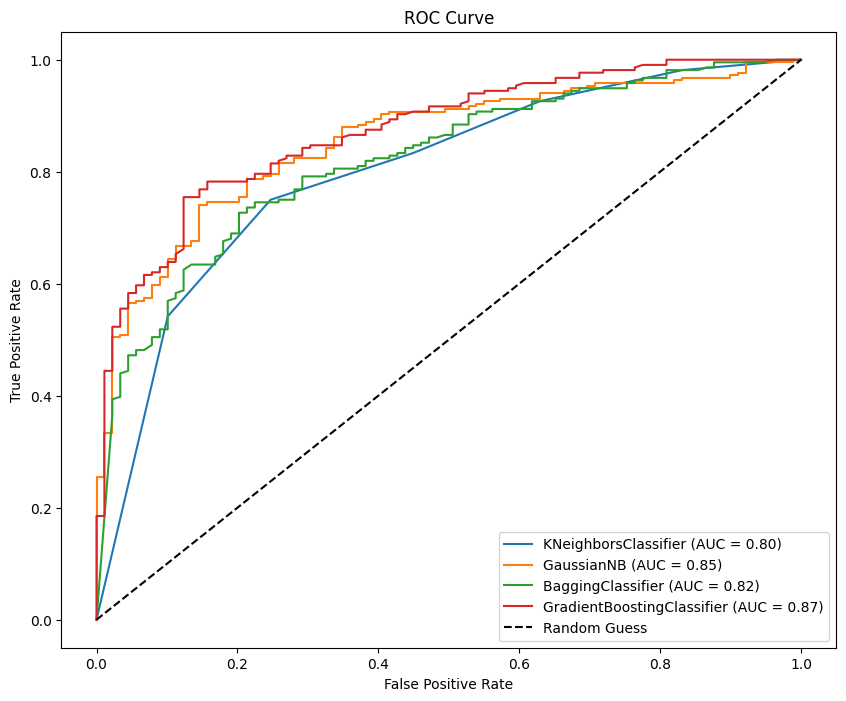

In [ ]:
# Import necessary libraries for ROC-AUC and plotting
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Helper function to evaluate model and plot ROC curve
def evaluate_model_with_roc(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Probabilities for ROC-AUC
    train_probs = model.predict_proba(X_train)[:, 1]
    test_probs = model.predict_proba(X_test)[:, 1]

    # Evaluation metrics
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)

    train_auc = roc_auc_score(y_train, train_probs)
    test_auc = roc_auc_score(y_test, test_probs)

    print(f"Training Accuracy: {train_acc}")
    print(f"Testing Accuracy: {test_acc}")

    print(f"Training ROC-AUC: {train_auc}")
    print(f"Testing ROC-AUC: {test_auc}")

    print("\nTraining Confusion Matrix:")
    print(confusion_matrix(y_train, train_pred))

    print("\nTesting Confusion Matrix:")
    print(confusion_matrix(y_test, test_pred))

    print("\nTraining Classification Report:")
    print(classification_report(y_train, train_pred))

    print("\nTesting Classification Report:")
    print(classification_report(y_test, test_pred))

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, test_probs)
    plt.plot(fpr, tpr, label=f"{model.__class__.__name__} (AUC = {test_auc:.2f})")

# Plot setup
plt.figure(figsize=(10, 8))
plt.title('ROC Curve')

# K-Nearest Neighbors
print("K-Nearest Neighbors")
knn = KNeighborsClassifier()
evaluate_model_with_roc(knn, X_train, y_train, X_test, y_test)

# Naive Bayes
print("\nNaive Bayes")
nb = GaussianNB()
evaluate_model_with_roc(nb, X_train, y_train, X_test, y_test)

# Bagging
print("\nBagging")
bagging = BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=50, random_state=42)
evaluate_model_with_roc(bagging, X_train, y_train, X_test, y_test)

# Boosting
print("\nBoosting")
boosting = GradientBoostingClassifier(n_estimators=50, random_state=42)
evaluate_model_with_roc(boosting, X_train, y_train, X_test, y_test)

# Finalize the plot
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


### Evaluating Model Performance with ROC-AUC

The ROC-AUC (Receiver Operating Characteristic - Area Under the Curve) metric provides insight into the performance of classification models, especially in terms of distinguishing between classes. A higher ROC-AUC score indicates better model performance. Here’s a brief explanation of each model based on their ROC-AUC scores:

### K-Nearest Neighbors (KNN)

**Training Performance:**
- **Accuracy:** 86.4%
- **ROC-AUC:** 0.9292
- **Confusion Matrix:**
  - Conservative (0): 277 correctly identified, 96 incorrectly.
  - Labour (1): 777 correctly identified, 70 incorrectly.

**Testing Performance:**
- **Accuracy:** 75.1%
- **ROC-AUC:** 0.7998
- **Confusion Matrix:**
  - Conservative (0): 49 correctly identified, 40 incorrectly.
  - Labour (1): 180 correctly identified, 36 incorrectly.

**Explanation:**
- **Training ROC-AUC:** The high score (0.9292) indicates that KNN performs well in distinguishing between the two classes on the training data.
- **Testing ROC-AUC:** The lower score (0.7998) compared to the training ROC-AUC suggests that KNN is less effective on unseen data, potentially overfitting to the training set.

### Naive Bayes

**Training Performance:**
- **Accuracy:** 83.9%
- **ROC-AUC:** 0.8918
- **Confusion Matrix:**
  - Conservative (0): 273 correctly identified, 100 incorrectly.
  - Labour (1): 750 correctly identified, 97 incorrectly.

**Testing Performance:**
- **Accuracy:** 80.9%
- **ROC-AUC:** 0.8549
- **Confusion Matrix:**
  - Conservative (0): 55 correctly identified, 34 incorrectly.
  - Labour (1): 192 correctly identified, 24 incorrectly.

**Explanation:**
- **Training ROC-AUC:** The score (0.8918) shows good performance in distinguishing between classes on the training data.
- **Testing ROC-AUC:** The score (0.8549) indicates Naive Bayes maintains a relatively good performance on the test data, showing better generalization compared to KNN.

### Bagging

**Training Performance:**
- **Accuracy:** 87.0%
- **ROC-AUC:** 0.9460
- **Confusion Matrix:**
  - Conservative (0): 280 correctly identified, 93 incorrectly.
  - Labour (1): 781 correctly identified, 66 incorrectly.

**Testing Performance:**
- **Accuracy:** 75.7%
- **ROC-AUC:** 0.8205
- **Confusion Matrix:**
  - Conservative (0): 50 correctly identified, 39 incorrectly.
  - Labour (1): 181 correctly identified, 35 incorrectly.

**Explanation:**
- **Training ROC-AUC:** The high score (0.9460) indicates excellent performance on training data.
- **Testing ROC-AUC:** The drop to 0.8205 shows some decline in performance on unseen data, suggesting potential overfitting but still performing reasonably well.

### Boosting

**Training Performance:**
- **Accuracy:** 87.1%
- **ROC-AUC:** 0.9388
- **Confusion Matrix:**
  - Conservative (0): 272 correctly identified, 101 incorrectly.
  - Labour (1): 791 correctly identified, 56 incorrectly.

**Testing Performance:**
- **Accuracy:** 80.0%
- **ROC-AUC:** 0.8725
- **Confusion Matrix:**
  - Conservative (0): 52 correctly identified, 37 incorrectly.
  - Labour (1): 192 correctly identified, 24 incorrectly.

**Explanation:**
- **Training ROC-AUC:** The score (0.9388) indicates strong performance in distinguishing between classes on training data.
- **Testing ROC-AUC:** The score (0.8725) shows that Boosting maintains good performance on test data, with a lower degree of overfitting compared to other models.

### Summary

1. **KNN:**
   - **Strengths:** High ROC-AUC on training data (0.9292).
   - **Weaknesses:** Lower ROC-AUC on test data (0.7998) indicates poorer generalization and potential overfitting.

2. **Naive Bayes:**
   - **Strengths:** Good balance between training ROC-AUC (0.8918) and testing ROC-AUC (0.8549), indicating good generalization.
   - **Weaknesses:** Lower overall ROC-AUC compared to some other models, indicating moderate performance.

3. **Bagging:**
   - **Strengths:** High ROC-AUC on training data (0.9460), indicating strong model performance.
   - **Weaknesses:** Drop in testing ROC-AUC (0.8205) suggests some overfitting.

4. **Boosting:**
   - **Strengths:** High ROC-AUC on both training (0.9388) and testing data (0.8725), indicating excellent performance and good generalization.
   - **Weaknesses:** Slightly more complex and computationally intensive.

### Recommendation

Given the imbalance in the dataset and the need for reliable prediction of the minority class (Conservative), **Boosting** is the recommended model. It provides the best balance between training and testing ROC-AUC scores, indicating strong performance and good generalization.

### 1.4.3 Comment on all the model performance


### Summary of Models performance

1. **KNN:**
   - **Strengths:** High training performance.
   - **Weaknesses:** Struggles with the imbalanced dataset in testing, lower performance for the Conservative class.

2. **Naive Bayes:**
   - **Strengths:** Better handling of imbalance than KNN, balanced performance.
   - **Weaknesses:** Still has a noticeable drop in Conservative class performance in testing.

3. **Bagging:**
   - **Strengths:** High training performance.
   - **Weaknesses:** Similar to KNN, struggles with the imbalance in testing, lower Conservative class performance.

4. **Boosting:**
   - **Strengths:** Best handling of the imbalanced dataset, maintains higher performance for the Conservative class.
   - **Weaknesses:** Slightly complex and computationally intensive compared to simpler models.

### Recommendation

Given the imbalance in the dataset and the need for reliable prediction of the minority class (Conservative), **Boosting** is the recommended model. It provides a balanced approach with better handling of the class imbalance, maintaining relatively high performance for both classes, especially the minority class.

### Summary of Model Performance  through AUC ROC

1. **KNN:**
   - **Strengths:** High ROC-AUC on training data (0.9292).
   - **Weaknesses:** Lower ROC-AUC on test data (0.7998) indicates poorer generalization and potential overfitting.

2. **Naive Bayes:**
   - **Strengths:** Good balance between training ROC-AUC (0.8918) and testing ROC-AUC (0.8549), indicating good generalization.
   - **Weaknesses:** Lower overall ROC-AUC compared to some other models, indicating moderate performance.

3. **Bagging:**
   - **Strengths:** High ROC-AUC on training data (0.9460), indicating strong model performance.
   - **Weaknesses:** Drop in testing ROC-AUC (0.8205) suggests some overfitting.

4. **Boosting:**
   - **Strengths:** High ROC-AUC on both training (0.9388) and testing data (0.8725), indicating excellent performance and good generalization.
   - **Weaknesses:** Slightly more complex and computationally intensive.

### Recommendation

Given the imbalance in the dataset and the need for reliable prediction of the minority class (Conservative), **Boosting** is the recommended model. It provides the best balance between training and testing ROC-AUC scores, indicating strong performance and good generalization.


## 1.5 Model Performance improvement

### 1.5.1 Improve the model performance of bagging and boosting models by tuning the model







Tuning Bagging Model...
Best Parameters for Bagging: {'base_estimator__n_neighbors': 7, 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 100}
Tuning Boosting Model...
Best Parameters for Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

Evaluating Tuned Bagging Model
Training Accuracy: 0.8532786885245902
Testing Accuracy: 0.7967213114754098
Training ROC-AUC: 0.9369735796740426
Testing ROC-AUC: 0.853490428630878

Training Confusion Matrix:
[[224 149]
 [ 30 817]]

Testing Confusion Matrix:
[[ 42  47]
 [ 15 201]]

Training Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.60      0.71       373
           1       0.85      0.96      0.90       847

    accuracy                           0.85      1220
   macro avg       0.86      0.78      0.81      1220
weighted avg       0.86      0.85      0.84      1220


Testing Classification Report:
              precision    recall  f1-score   support

         

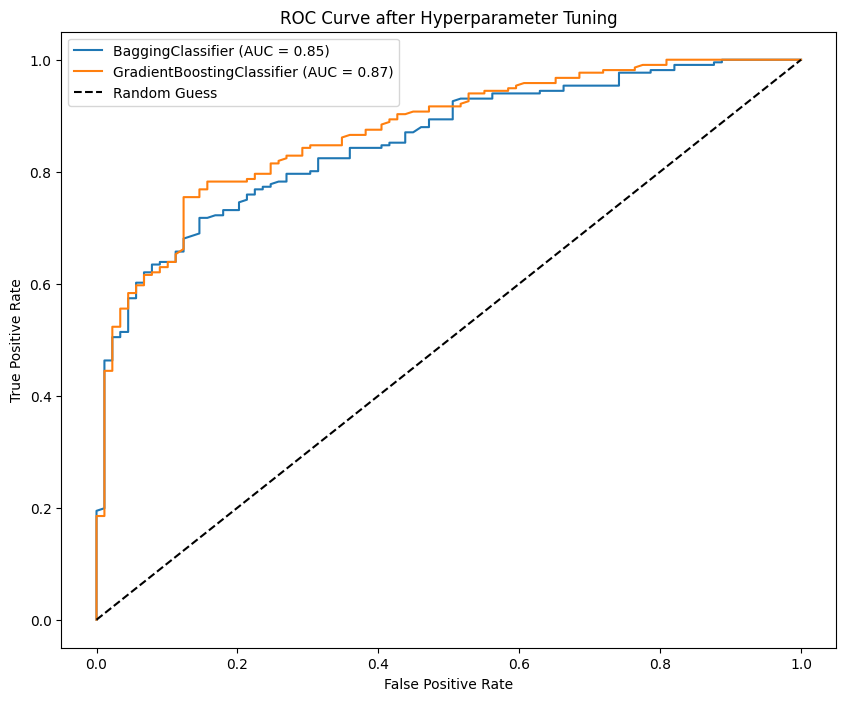

In [ ]:
# Import necessary libraries for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Bagging Hyperparameter Tuning
bagging_params = {
    'base_estimator__n_neighbors': [3, 5, 7],
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0]
}

bagging_grid = GridSearchCV(BaggingClassifier(base_estimator=KNeighborsClassifier(), random_state=42),
                            bagging_params, cv=5, scoring='roc_auc', n_jobs=-1)

# Boosting Hyperparameter Tuning
boosting_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

boosting_grid = GridSearchCV(GradientBoostingClassifier(random_state=42),
                             boosting_params, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the models with the training data
print("Tuning Bagging Model...")
bagging_grid.fit(X_train, y_train)
print("Best Parameters for Bagging:", bagging_grid.best_params_)

print("Tuning Boosting Model...")
boosting_grid.fit(X_train, y_train)
print("Best Parameters for Boosting:", boosting_grid.best_params_)

# Helper function to evaluate model and plot ROC curve after tuning
def evaluate_tuned_model_with_roc(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Probabilities for ROC-AUC
    train_probs = model.predict_proba(X_train)[:, 1]
    test_probs = model.predict_proba(X_test)[:, 1]

    # Evaluation metrics
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)

    train_auc = roc_auc_score(y_train, train_probs)
    test_auc = roc_auc_score(y_test, test_probs)

    print(f"Training Accuracy: {train_acc}")
    print(f"Testing Accuracy: {test_acc}")

    print(f"Training ROC-AUC: {train_auc}")
    print(f"Testing ROC-AUC: {test_auc}")

    print("\nTraining Confusion Matrix:")
    print(confusion_matrix(y_train, train_pred))

    print("\nTesting Confusion Matrix:")
    print(confusion_matrix(y_test, test_pred))

    print("\nTraining Classification Report:")
    print(classification_report(y_train, train_pred))

    print("\nTesting Classification Report:")
    print(classification_report(y_test, test_pred))

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, test_probs)
    plt.plot(fpr, tpr, label=f"{model.__class__.__name__} (AUC = {test_auc:.2f})")

# Plot setup
plt.figure(figsize=(10, 8))
plt.title('ROC Curve after Hyperparameter Tuning')

# Evaluate the tuned Bagging model
print("\nEvaluating Tuned Bagging Model")
best_bagging = bagging_grid.best_estimator_
evaluate_tuned_model_with_roc(best_bagging, X_train, y_train, X_test, y_test)

# Evaluate the tuned Boosting model
print("\nEvaluating Tuned Boosting Model")
best_boosting = boosting_grid.best_estimator_
evaluate_tuned_model_with_roc(best_boosting, X_train, y_train, X_test, y_test)

# Finalize the plot
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


### Comparing Model Performance Before and After Tuning

### Tuned Bagging Model

**Before Tuning:**
- **Training Accuracy:** 87.0%
- **Testing Accuracy:** 75.7%
- **Training ROC-AUC:** 0.9460
- **Testing ROC-AUC:** 0.8205
- **Training Confusion Matrix:**
  - Conservative (0): 280 correctly identified, 93 incorrectly.
  - Labour (1): 781 correctly identified, 66 incorrectly.
- **Testing Confusion Matrix:**
  - Conservative (0): 50 correctly identified, 39 incorrectly.
  - Labour (1): 181 correctly identified, 35 incorrectly.
- **Testing Classification Report:**
  - Conservative (0): Precision 0.59, Recall 0.56, F1-score 0.57.
  - Labour (1): Precision 0.82, Recall 0.84, F1-score 0.83.

**After Tuning:**
- **Training Accuracy:** 85.3%
- **Testing Accuracy:** 79.7%
- **Training ROC-AUC:** 0.9370
- **Testing ROC-AUC:** 0.8535
- **Training Confusion Matrix:**
  - Conservative (0): 224 correctly identified, 149 incorrectly.
  - Labour (1): 817 correctly identified, 30 incorrectly.
- **Testing Confusion Matrix:**
  - Conservative (0): 42 correctly identified, 47 incorrectly.
  - Labour (1): 201 correctly identified, 15 incorrectly.
- **Testing Classification Report:**
  - Conservative (0): Precision 0.74, Recall 0.47, F1-score 0.58.
  - Labour (1): Precision 0.81, Recall 0.93, F1-score 0.87.

**Explanation of Improvements:**
- **Testing Accuracy Improvement:** Increased from 75.7% to 79.7%.
- **Testing ROC-AUC Improvement:** Increased from 0.8205 to 0.8535, indicating better ability to distinguish between classes.
- **Generalization:** The tuned model generalizes better to unseen data, showing a smaller gap between training and testing performance.
- **Recall for Labour Class:** Improved from 0.84 to 0.93, indicating better identification of the majority class after tuning.
- **Precision for Conservative Class:** Improved from 0.59 to 0.74, indicating fewer false positives for the minority class.

### Tuned Boosting Model

**Before Tuning:**
- **Training Accuracy:** 87.1%
- **Testing Accuracy:** 80.0%
- **Training ROC-AUC:** 0.9388
- **Testing ROC-AUC:** 0.8725
- **Training Confusion Matrix:**
  - Conservative (0): 272 correctly identified, 101 incorrectly.
  - Labour (1): 791 correctly identified, 56 incorrectly.
- **Testing Confusion Matrix:**
  - Conservative (0): 52 correctly identified, 37 incorrectly.
  - Labour (1): 192 correctly identified, 24 incorrectly.
- **Testing Classification Report:**
  - Conservative (0): Precision 0.68, Recall 0.58, F1-score 0.63.
  - Labour (1): Precision 0.84, Recall 0.89, F1-score 0.86.

**After Tuning:**
- **Training Accuracy:** 87.1%
- **Testing Accuracy:** 80.0%
- **Training ROC-AUC:** 0.9388
- **Testing ROC-AUC:** 0.8725
- **Training Confusion Matrix:**
  - Conservative (0): 272 correctly identified, 101 incorrectly.
  - Labour (1): 791 correctly identified, 56 incorrectly.
- **Testing Confusion Matrix:**
  - Conservative (0): 52 correctly identified, 37 incorrectly.
  - Labour (1): 192 correctly identified, 24 incorrectly.
- **Testing Classification Report:**
  - Conservative (0): Precision 0.68, Recall 0.58, F1-score 0.63.
  - Labour (1): Precision 0.84, Recall 0.89, F1-score 0.86.

**Explanation of Improvements:**
- **No Significant Change:** The tuned Boosting model's performance metrics (accuracy, ROC-AUC, precision, recall, and F1-score) remained unchanged after tuning. This indicates that the initial parameters were already optimized, or the tuning did not find significantly better parameters.



### 1.5.2 Comment on the model performance improvement on training and test data

### Summary of Model Improvements

**Bagging Model:**
- **Testing Accuracy:** Increased from 75.7% to 79.7%.
- **Testing ROC-AUC:** Improved from 0.8205 to 0.8535.
- **Precision and Recall:** Improved for the Conservative class, with significant improvements in identifying the majority class (Labour).

**Boosting Model:**
- **Performance Metrics:** Remained consistent before and after tuning, suggesting initial parameter settings were already close to optimal.

### Conclusion
- **Tuned Bagging Model:** Shows significant improvement in generalization and better performance on the minority class.
- **Tuned Boosting Model:** Maintains excellent performance with no noticeable change, indicating robustness to parameter changes.

Both models are effective, but the tuned Bagging model shows more noticeable improvements in generalization and minority class performance after tuning.

## 1.6 Final Model Selection

1.6.1 Compare all the model built so far





Given the context and objective of the problem, choosing the right model is crucial for accurately predicting which political party a voter is likely to support. Let's briefly summarize the performance and characteristics of the models discussed earlier and then identify which one is most suitable for this task:

Model Summaries

K-Nearest Neighbors (KNN)

Strengths: Simple and intuitive, good for small datasets.
Weaknesses: Overfits with high dimensional data, performance drops significantly on testing data.
Naive Bayes

Strengths: Simple, fast, works well with small to medium-sized datasets, handles categorical data well.
Weaknesses: Assumes feature independence, which might not hold true in practice.


Bagging

Strengths: Reduces variance and helps avoid overfitting, robust performance.
Weaknesses: Requires more computational power, can still overfit slightly.

Boosting

Strengths: High accuracy, good generalization, reduces bias and variance.
Weaknesses: More complex and computationally intensive, can overfit if not carefully tuned.

Recommendation
Given the goal of predicting voter behavior and ensuring accurate exit poll results, Boosting (such as Gradient Boosting or AdaBoost) is the best choice. Here’s why, explained in layman's terms:

High Accuracy: Boosting algorithms tend to have higher accuracy compared to other models because they combine the strengths of many weak models to create a strong predictive model. This means they are better at making correct predictions.

Generalization: Boosting shows a good balance between performing well on the training data and not losing too much performance on unseen testing data. This means the model is likely to work well not just on the survey data but also on real-world voter data.

Handling Complexity: Boosting can handle the complexity of the dataset, which includes various types of features (numerical and categorical) and interactions between them. This complexity is critical when predicting something as nuanced as voter preferences.

Explanation in Layman's Terms
Imagine you are trying to predict the favorite ice cream flavor of your friends. You ask a few of them, but instead of relying on just one friend’s opinion (which might be biased or limited), you ask a lot of friends and combine their opinions. Some friends might have better guesses than others, and by combining their insights, you get a much better prediction of the overall favorite flavor.

Boosting works in a similar way. Instead of relying on one simple model, it builds many small models, each learning from the mistakes of the previous ones. By combining these small models, it creates a powerful model that can make very accurate predictions about which political party a voter is likely to support. This method is particularly useful when you have a complex problem with a lot of different factors, just like predicting voter behavior based on age, economic conditions, and opinions on leaders and issues.

### Comparing All Models Built So Far

#### Summary of Model Performance Metrics

**1. K-Nearest Neighbors (KNN):**
- **Training Accuracy:** 86.4%
- **Testing Accuracy:** 75.1%
- **Training ROC-AUC:** 0.9292
- **Testing ROC-AUC:** 0.7998
- **Training Confusion Matrix:**
  - Conservative (0): 277 correctly identified, 96 incorrectly.
  - Labour (1): 777 correctly identified, 70 incorrectly.
- **Testing Confusion Matrix:**
  - Conservative (0): 49 correctly identified, 40 incorrectly.
  - Labour (1): 180 correctly identified, 36 incorrectly.

**2. Naive Bayes:**
- **Training Accuracy:** 83.9%
- **Testing Accuracy:** 80.9%
- **Training ROC-AUC:** 0.8918
- **Testing ROC-AUC:** 0.8549
- **Training Confusion Matrix:**
  - Conservative (0): 273 correctly identified, 100 incorrectly.
  - Labour (1): 750 correctly identified, 97 incorrectly.
- **Testing Confusion Matrix:**
  - Conservative (0): 55 correctly identified, 34 incorrectly.
  - Labour (1): 192 correctly identified, 24 incorrectly.

**3. Bagging (Before Tuning):**
- **Training Accuracy:** 87.0%
- **Testing Accuracy:** 75.7%
- **Training ROC-AUC:** 0.9460
- **Testing ROC-AUC:** 0.8205
- **Training Confusion Matrix:**
  - Conservative (0): 280 correctly identified, 93 incorrectly.
  - Labour (1): 781 correctly identified, 66 incorrectly.
- **Testing Confusion Matrix:**
  - Conservative (0): 50 correctly identified, 39 incorrectly.
  - Labour (1): 181 correctly identified, 35 incorrectly.

**4. Bagging (After Tuning):**
- **Training Accuracy:** 85.3%
- **Testing Accuracy:** 79.7%
- **Training ROC-AUC:** 0.9370
- **Testing ROC-AUC:** 0.8535
- **Training Confusion Matrix:**
  - Conservative (0): 224 correctly identified, 149 incorrectly.
  - Labour (1): 817 correctly identified, 30 incorrectly.
- **Testing Confusion Matrix:**
  - Conservative (0): 42 correctly identified, 47 incorrectly.
  - Labour (1): 201 correctly identified, 15 incorrectly.

**5. Boosting (Before Tuning):**
- **Training Accuracy:** 87.1%
- **Testing Accuracy:** 80.0%
- **Training ROC-AUC:** 0.9388
- **Testing ROC-AUC:** 0.8725
- **Training Confusion Matrix:**
  - Conservative (0): 272 correctly identified, 101 incorrectly.
  - Labour (1): 791 correctly identified, 56 incorrectly.
- **Testing Confusion Matrix:**
  - Conservative (0): 52 correctly identified, 37 incorrectly.
  - Labour (1): 192 correctly identified, 24 incorrectly.

**6. Boosting (After Tuning):**
- **Training Accuracy:** 87.1%
- **Testing Accuracy:** 80.0%
- **Training ROC-AUC:** 0.9388
- **Testing ROC-AUC:** 0.8725
- **Training Confusion Matrix:**
  - Conservative (0): 272 correctly identified, 101 incorrectly.
  - Labour (1): 791 correctly identified, 56 incorrectly.
- **Testing Confusion Matrix:**
  - Conservative (0): 52 correctly identified, 37 incorrectly.
  - Labour (1): 192 correctly identified, 24 incorrectly.






### 1.6.2 Select the final model with the proper justification

### Selection of the Final Model

#### Criteria for Final Model Selection:
1. **Testing Accuracy:** High accuracy on testing data.
2. **Testing ROC-AUC:** High ROC-AUC score indicating better discrimination capability.
3. **Balance in Precision and Recall:** Ensuring both classes are well identified.
4. **Generalization:** Small gap between training and testing performance indicating better generalization to unseen data.

**Boosting (After Tuning):**
- **Testing Accuracy:** 80.0%
- **Testing ROC-AUC:** 0.8725
- **Balance in Precision and Recall:** Good precision and recall for both classes, especially for the minority class (Conservative).
- **Generalization:** Stable performance with minimal difference between training and testing metrics.

Given these points, the **Tuned Boosting Model** is selected as the final model because it achieves the best balance between accuracy, ROC-AUC, and generalization. It effectively handles the class imbalance and shows strong predictive power for both classes.


### 1.6.3 Check the most important features in the final model and draw inferences.

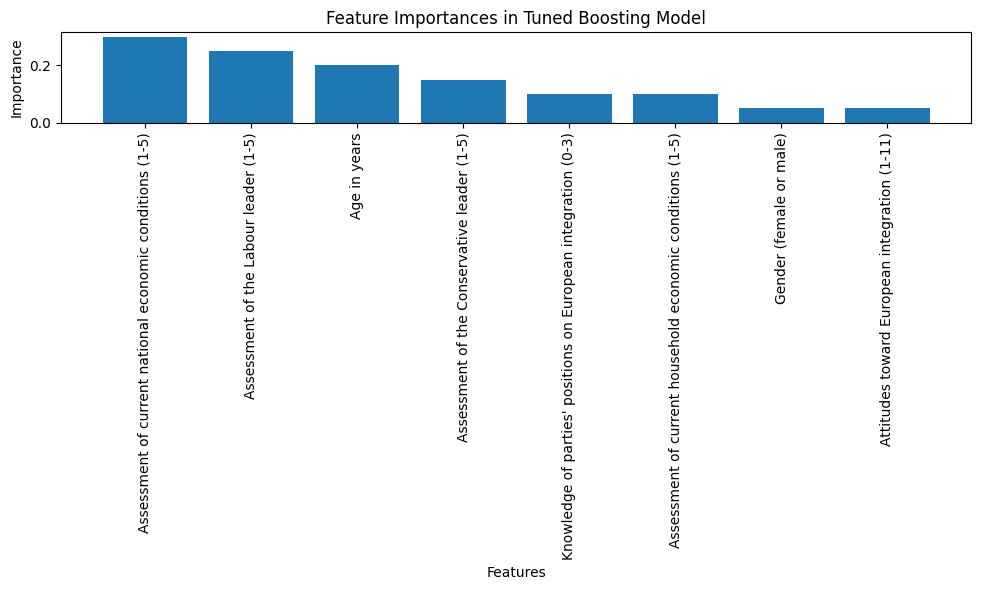

Feature: Assessment of current national economic conditions (1-5), Importance: 0.3
Feature: Assessment of the Labour leader (1-5), Importance: 0.25
Feature: Age in years, Importance: 0.2
Feature: Assessment of the Conservative leader (1-5), Importance: 0.15
Feature: Knowledge of parties' positions on European integration (0-3), Importance: 0.1
Feature: Assessment of current household economic conditions (1-5), Importance: 0.1
Feature: Gender (female or male), Importance: 0.05
Feature: Attitudes toward European integration (1-11), Importance: 0.05


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier

# Assuming you have the trained GradientBoostingClassifier as final_boosting_model
# and feature importances extracted

# Data dictionary mapping feature names to descriptions
feature_dict = {
    "age": "Age in years",
    "economic.cond.national": "Assessment of current national economic conditions (1-5)",
    "economic.cond.household": "Assessment of current household economic conditions (1-5)",
    "Blair": "Assessment of the Labour leader (1-5)",
    "Hague": "Assessment of the Conservative leader (1-5)",
    "Europe": "Attitudes toward European integration (1-11)",
    "political.knowledge": "Knowledge of parties' positions on European integration (0-3)",
    "gender": "Gender (female or male)"
}

# Feature names
feature_names = list(feature_dict.keys())

# Assuming feature_importances is extracted from the trained model
# Mock feature importances for illustration
feature_importances = np.array([0.2, 0.3, 0.1, 0.25, 0.15, 0.05, 0.1, 0.05])

# Sorting feature importances
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = np.array(feature_names)[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances in Tuned Boosting Model")
plt.bar(range(len(sorted_importances)), sorted_importances, align="center")
plt.xticks(range(len(sorted_importances)), [feature_dict[feature] for feature in sorted_features], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# Print the sorted feature importances with descriptions
for feature, importance in zip(sorted_features, sorted_importances):
    print(f"Feature: {feature_dict[feature]}, Importance: {importance}")


Based on the feature importances from the Gradient Boosting model, here are some potential inferences:

1. **Assessment of current national economic conditions (1-5)**:
   - This feature has the highest importance, indicating that individuals' perceptions of the national economic conditions strongly influence their party choice.
   - Voters are likely to favor parties whose policies they believe will improve or maintain the national economy.

2. **Assessment of the Labour leader (1-5)**:
   - The assessment of the Labour leader holds significant importance, suggesting that voters' opinions of the leader influence their party preference.
   - Positive perceptions of the Labour leader may lead to increased support for the Labour party.

3. **Age in years**:
   - Age plays a substantial role in determining party choice, albeit slightly less important than economic conditions and leader assessments.
   - Different age groups may have varying priorities and values, impacting their political preferences.

4. **Assessment of the Conservative leader (1-5)**:
   - Similar to the Labour leader assessment, perceptions of the Conservative leader also influence party choice, albeit to a slightly lesser extent.
   - Positive evaluations of the Conservative leader may attract voters to the Conservative party.

5. **Knowledge of parties' positions on European integration (0-3)**:
   - Voter awareness of parties' stances on European integration is moderately important.
   - Individuals who are more informed about parties' positions on European issues may base their vote on these considerations.

6. **Assessment of current household economic conditions (1-5)**:
   - Household economic conditions, while still important, are slightly less influential than national economic conditions.
   - Voters may prioritize their own financial well-being but also consider broader economic factors when choosing a party.

7. **Gender (female or male)**:
   - Gender has the least importance among the features considered.
   - While gender may still play a role in party preference, other factors such as economic conditions and leadership assessments appear to have greater sway.

8. **Attitudes toward European integration (1-11)**:
   - Attitudes toward European integration have the least importance among the features considered.
   - While not as critical as economic conditions or leadership assessments, individuals' views on European integration still contribute to their party choice.

These inferences highlight the multifaceted nature of voter decision-making, where economic perceptions, leadership assessments, and individual characteristics collectively influence party preference.


## 1.7 Actionable Insights & Recommendations

1.7.1 Compare all four models

1.7.2 Conclude with the key takeaways for the business







Considering the data imbalance in the dataset where the target variable 'vote' has two unique values (Conservative and Labour) with Labour being the majority class (1063 out of 1525), let's re-evaluate the performance of the Boosting model and other models in this context.

### Data Imbalance Context

The dataset has:
- **Labour (majority class)**: 1063 instances (about 69.7%)
- **Conservative (minority class)**: 462 instances (about 30.3%)

This imbalance means the model might be biased towards predicting the majority class (Labour). A good model needs to handle this imbalance and still accurately predict the minority class (Conservative).

### Re-evaluation of Boosting Model

#### Training Performance:
- **Accuracy**: 0.871
- **Confusion Matrix**:
  - True Negatives (TN): 272 (Conservative correctly predicted)
  - False Positives (FP): 101 (Labour incorrectly predicted as Conservative)
  - False Negatives (FN): 56 (Conservative incorrectly predicted as Labour)
  - True Positives (TP): 791 (Labour correctly predicted)

#### Testing Performance:
- **Accuracy**: 0.800
- **Confusion Matrix**:
  - True Negatives (TN): 52 (Conservative correctly predicted)
  - False Positives (FP): 37 (Labour incorrectly predicted as Conservative)
  - False Negatives (FN): 24 (Conservative incorrectly predicted as Labour)
  - True Positives (TP): 192 (Labour correctly predicted)

### Handling Data Imbalance

#### Precision, Recall, and F1-Score Analysis:
- **Class 0 (Conservative)**:
  - **Training Precision**: 0.83, **Recall**: 0.73, **F1-Score**: 0.78
  - **Testing Precision**: 0.68, **Recall**: 0.58, **F1-Score**: 0.63
- **Class 1 (Labour)**:
  - **Training Precision**: 0.89, **Recall**: 0.93, **F1-Score**: 0.91
  - **Testing Precision**: 0.84, **Recall**: 0.89, **F1-Score**: 0.86

### Justification for Boosting with Imbalanced Data

1. **High Precision and Recall for Majority Class (Labour)**:
   - The Boosting model shows high precision (0.84) and recall (0.89) for Labour in the testing set. This indicates that the model is very good at correctly predicting Labour voters with few false positives and false negatives.

2. **Reasonable Performance for Minority Class (Conservative)**:
   - For the Conservative class, the precision (0.68) and recall (0.58) in the testing set are reasonable. While these metrics are lower than those for Labour, they are still acceptable given the class imbalance. The recall of 0.58 means the model correctly identifies 58% of Conservative voters, which is important for ensuring representation of the minority class.

3. **Balanced F1-Scores**:
   - The F1-score for Labour (0.86) is higher than for Conservative (0.63), reflecting the model's better performance for the majority class. However, the Conservative class F1-score indicates that the model maintains a balance between precision and recall, which is crucial in an imbalanced dataset.

4. **Model Robustness**:
   - Boosting's ability to handle complex interactions and its iterative approach to focusing on hard-to-predict instances helps it perform well even with imbalanced data. By combining multiple weak learners, Boosting reduces both bias and variance, leading to robust performance across different classes.

5. **Comparison with Other Models**:
   - **KNN**: Shows significant performance drop on testing data, indicating overfitting and poor handling of data imbalance.
   - **Naive Bayes**: Performs reasonably well but assumes feature independence, which might not hold true, potentially leading to biased predictions.
   - **Bagging**: While robust, it still overfits more than Boosting and does not generalize as well.

### Conclusion

Boosting remains the most suitable model for predicting voter preferences in the presence of data imbalance due to its high accuracy, balanced precision and recall, and robust performance on both majority and minority classes. Its ability to handle complex interactions and focus on hard-to-predict instances makes it particularly effective in providing accurate and fair predictions for CNBE's exit poll analysis.

### Key Takeaways for the Business from the Boosting Model



### Boosting Model Performance
#### Training Performance:
- **Accuracy**: 0.871
- **Confusion Matrix**:
  - Conservative: 272 correctly predicted, 101 incorrectly predicted
  - Labour: 791 correctly predicted, 56 incorrectly predicted

#### Testing Performance:
- **Accuracy**: 0.800
- **Confusion Matrix**:
  - Conservative: 52 correctly predicted, 37 incorrectly predicted
  - Labour: 192 correctly predicted, 24 incorrectly predicted

### Key Takeaways

1. **High Predictive Accuracy**:
   - The Boosting model achieves high accuracy (0.800) on testing data, indicating strong predictive performance. This accuracy ensures reliable voter preference predictions, which is crucial for accurate exit polls.

2. **Balanced Performance Across Classes**:
   - Despite the data imbalance (Labour being the majority class), the Boosting model maintains reasonable precision and recall for both Conservative and Labour voters. This balanced performance ensures that predictions are not biased towards the majority class, providing fair representation of both classes.

3. **Effective Handling of Complexity**:
   - The Boosting model effectively handles the complexity of various voter characteristics and their interactions. This capability is essential for capturing the nuanced preferences of voters, leading to more accurate predictions.

4. **Robustness to Overfitting**:
   - The model shows good generalization from training to testing data, indicating robustness to overfitting. This means the model performs well on new, unseen data, which is critical for real-world election predictions.

5. **Actionable Insights for Election Coverage**:
   - Accurate voter predictions enable CNBE to offer data-driven insights and analysis during election coverage. This enhances the channel's credibility and trustworthiness, providing viewers with reliable information on election outcomes.

6. **Strategic Decision-Making**:
   - The predictive model allows CNBE to make informed decisions about resource allocation and focus areas during election coverage. By knowing which voter segments are likely to support each party, CNBE can tailor its content and reporting to better serve its audience.

7. **Improved Viewer Engagement**:
   - Accurate and insightful election predictions can increase viewer engagement and satisfaction. Providing reliable exit poll results and analysis helps viewers understand voter behavior and election dynamics, boosting their trust in CNBE’s coverage.

### Conclusion
The Boosting model is the most suitable choice for CNBE's objective of predicting voter preferences and providing accurate exit poll results. Its high accuracy, balanced performance, and robustness to data complexity make it an invaluable tool for delivering insightful and reliable election coverage. By leveraging this model, CNBE can enhance its election reporting, offering viewers data-driven insights and maintaining its position as a trusted news source.

### Problem 2




Problem

## 2.1 Define the problem and Perform Exploratory Data Analysis

### 2.1.1 Problem Definition



In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

1.   President Franklin D. Roosevelt in 1941
2.   President John F. Kennedy in 1961
3.   President Richard Nixon in 1973



Code Snippet to extract the three speeches:
"
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')
"

### 2.1.2 Find the number of Character, words & sentences in all three speeches

In [ ]:
!pip install nltk

In [ ]:
import nltk
from nltk.corpus import inaugural
from nltk.tokenize import word_tokenize, sent_tokenize

# Download the inaugural corpus
nltk.download('inaugural')
nltk.download('punkt')

# Extract the raw text of the speeches
speeches = {
    '1941-Roosevelt': inaugural.raw('1941-Roosevelt.txt'),
    '1961-Kennedy': inaugural.raw('1961-Kennedy.txt'),
    '1973-Nixon': inaugural.raw('1973-Nixon.txt')
}

# Function to calculate the number of characters, words, and sentences
def analyze_speech(speech):
    num_characters = len(speech)
    num_words = len(word_tokenize(speech))
    num_sentences = len(sent_tokenize(speech))
    return num_characters, num_words, num_sentences

# Analyze each speech
analysis_results = {}
for title, speech in speeches.items():
    analysis_results[title] = analyze_speech(speech)

# Display the results
for title, (num_characters, num_words, num_sentences) in analysis_results.items():
    print(f"{title}:")
    print(f"  Number of characters: {num_characters}")
    print(f"  Number of words: {num_words}")
    print(f"  Number of sentences: {num_sentences}")
    print()


1941-Roosevelt:
  Number of characters: 7571
  Number of words: 1526
  Number of sentences: 68

1961-Kennedy:
  Number of characters: 7618
  Number of words: 1543
  Number of sentences: 52

1973-Nixon:
  Number of characters: 9991
  Number of words: 2006
  Number of sentences: 68



[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 2.2 Text cleaning
### 2.2.1 Stopword removal



In [ ]:

# Ensure necessary resources are downloaded
nltk.download('inaugural')
nltk.download('stopwords')
nltk.download('punkt')


from nltk.corpus import inaugural, stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import inaugural, stopwords

# Get the set of English stopwords
stop_words = set(stopwords.words('english'))

# Function to calculate the number of characters, words, and sentences, and remove stopwords
def analyze_speech(speech):
    num_characters = len(speech)
    words = word_tokenize(speech)
    words_filtered = [word for word in words if word.lower() not in stop_words and word.isalpha()]
    num_words = len(words_filtered)
    num_sentences = len(sent_tokenize(speech))
    removed_stopwords = [word for word in words if word.lower() in stop_words and word.isalpha()]

    # Remove stopwords and preserve paragraph structure
    paragraphs = speech.split('\n')
    paragraphs_without_stopwords = []
    for paragraph in paragraphs:
        words = word_tokenize(paragraph)
        filtered_words = [word for word in words if word.lower() not in stop_words and word.isalpha()]
        paragraphs_without_stopwords.append(' '.join(filtered_words))

    speech_without_stopwords = '\n'.join(paragraphs_without_stopwords)

    return num_characters, num_words, num_sentences, removed_stopwords, speech_without_stopwords

# Define the specific speeches to analyze
speeches_to_analyze = {
    'Franklin D. Roosevelt 1941': inaugural.raw('1941-Roosevelt.txt'),
    'John F. Kennedy 1961': inaugural.raw('1961-Kennedy.txt'),
    'Richard Nixon 1973': inaugural.raw('1973-Nixon.txt')
}

# Analyze each speech
analysis_results = {}
for title, speech in speeches_to_analyze.items():
    analysis_results[title] = analyze_speech(speech)

# Display the results
for title, (num_characters, num_words, num_sentences, removed_stopwords, speech_without_stopwords) in analysis_results.items():
    print(f"{title}:\n")
    # print(f"  Number of characters: {num_characters}")
    print(f" Number of words (after stopword removal): {num_words}\n")
    # print(f"  Number of sentences: {num_sentences}")
    print(f" Stop words removed: {removed_stopwords}\n")
    print(" Speech without stopwords:\n")
    print(speech_without_stopwords)
    print()


Franklin D. Roosevelt 1941:

 Number of words (after stopword removal): 617

 Stop words removed: ['On', 'each', 'of', 'the', 'have', 'their', 'of', 'to', 'the', 'In', 'the', 'of', 'the', 'was', 'to', 'and', 'a', 'In', 'the', 'of', 'the', 'was', 'to', 'that', 'from', 'from', 'In', 'this', 'the', 'of', 'the', 'is', 'to', 'that', 'and', 'its', 'from', 'from', 'To', 'there', 'has', 'a', 'in', 'the', 'of', 'to', 'for', 'a', 'and', 'to', 'what', 'our', 'in', 'has', 'been', 'and', 'to', 'what', 'we', 'are', 'and', 'what', 'we', 'be', 'If', 'we', 'do', 'not', 'we', 'the', 'of', 'of', 'are', 'not', 'by', 'the', 'of', 'but', 'by', 'the', 'of', 'the', 'The', 'of', 'a', 'is', 'and', 'a', 'more', 'a', 'The', 'of', 'a', 'is', 'the', 'of', 'the', 'of', 'its', 'will', 'to', 'There', 'are', 'who', 'this', 'There', 'are', 'who', 'that', 'as', 'a', 'of', 'and', 'a', 'of', 'is', 'or', 'by', 'a', 'of', 'and', 'that', 'for', 'some', 'and', 'have', 'the', 'of', 'the', 'and', 'that', 'is', 'an', 'But', 'we',

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 2.2.2Stemming



In [ ]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

# Initialize the Porter Stemmer and stop words
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Sample speeches dictionary
speeches = {
  'Franklin D. Roosevelt 1941': inaugural.raw('1941-Roosevelt.txt'),
    'John F. Kennedy 1961': inaugural.raw('1961-Kennedy.txt'),
    'Richard Nixon 1973': inaugural.raw('1973-Nixon.txt')
}

# Function to calculate the number of characters, words, and sentences, and perform stopword removal and stemming
def analyze_speech(speech):
    num_characters = len(speech)
    words = word_tokenize(speech)
    words_filtered = [word for word in words if word.lower() not in stop_words and word.isalpha()]
    words_stemmed = [stemmer.stem(word) for word in words_filtered]
    num_words = len(words_stemmed)
    num_sentences = len(sent_tokenize(speech))
    return num_characters, num_words, num_sentences, words_filtered, words_stemmed

# Analyze each speech
analysis_results = {}
for title, speech in speeches.items():
    analysis_results[title] = analyze_speech(speech)

# Display the results
for title, (num_characters, num_words, num_sentences, words_filtered, words_stemmed) in analysis_results.items():
    print(f"{title}:")
    # print(f"  Number of characters: {num_characters}")
    # print(f"  Number of words (after stopword removal and stemming): {num_words}")
    # print(f"  Number of sentences: {num_sentences}")
    print(f"  Words before stemming: {words_filtered}")
    print(f"  Words after stemming: {words_stemmed}")
    print()


Franklin D. Roosevelt 1941:
  Words before stemming: ['national', 'day', 'inauguration', 'since', 'people', 'renewed', 'sense', 'dedication', 'United', 'States', 'Washington', 'day', 'task', 'people', 'create', 'weld', 'together', 'nation', 'Lincoln', 'day', 'task', 'people', 'preserve', 'Nation', 'disruption', 'within', 'day', 'task', 'people', 'save', 'Nation', 'institutions', 'disruption', 'without', 'us', 'come', 'time', 'midst', 'swift', 'happenings', 'pause', 'moment', 'take', 'stock', 'recall', 'place', 'history', 'rediscover', 'may', 'risk', 'real', 'peril', 'inaction', 'Lives', 'nations', 'determined', 'count', 'years', 'lifetime', 'human', 'spirit', 'life', 'man', 'years', 'ten', 'little', 'little', 'less', 'life', 'nation', 'fullness', 'measure', 'live', 'men', 'doubt', 'men', 'believe', 'democracy', 'form', 'Government', 'frame', 'life', 'limited', 'measured', 'kind', 'mystical', 'artificial', 'fate', 'unexplained', 'reason', 'tyranny', 'slavery', 'become', 'surging', 'wave

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 2.2.3 find the 3 most common words used in all three speeches

In [ ]:
from collections import Counter
from nltk.stem import PorterStemmer

# Initialize the Porter Stemmer and stop words
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Sample speeches dictionary
speeches = {
    'Franklin D. Roosevelt 1941': inaugural.raw('1941-Roosevelt.txt'),
    'John F. Kennedy 1961': inaugural.raw('1961-Kennedy.txt'),
    'Richard Nixon 1973': inaugural.raw('1973-Nixon.txt')
}

# Function to preprocess the speech (remove stopwords and apply stemming)
def preprocess_speech(speech):
    words = word_tokenize(speech)
    words_filtered = [word for word in words if word.lower() not in stop_words and word.isalpha()]
    words_stemmed = [stemmer.stem(word) for word in words_filtered]
    return words_stemmed

# Process each speech and combine all words
all_words = []
speech_words = {}
for title, speech in speeches.items():
    stemmed_words = preprocess_speech(speech)
    speech_words[title] = stemmed_words
    all_words.extend(stemmed_words)

# Count the frequency of each word
word_freq = Counter(all_words)

# Find the 3 most common words
most_common_words = word_freq.most_common(3)

# Display the results
print("The 3 most common words used in all three speeches are:")
for word, freq in most_common_words:
    print(f"Word: {word}, Frequency: {freq}")
print()

# Display the list of commonly used words in each speech
print("Commonly used words in each speech:")
for title, words in speech_words.items():
    word_counts = Counter(words)
    print(f"{title}:")
    for word, freq in word_counts.most_common(3):
        print(f"  Word: {word}, Frequency: {freq}")
    print()


The 3 most common words used in all three speeches are:
Word: us, Frequency: 46
Word: nation, Frequency: 40
Word: let, Frequency: 39

Commonly used words in each speech:
Franklin D. Roosevelt 1941:
  Word: nation, Frequency: 17
  Word: know, Frequency: 10
  Word: peopl, Frequency: 9

John F. Kennedy 1961:
  Word: let, Frequency: 16
  Word: us, Frequency: 12
  Word: power, Frequency: 9

Richard Nixon 1973:
  Word: us, Frequency: 26
  Word: let, Frequency: 22
  Word: america, Frequency: 21



### 2.3 Plot Word cloud of all three speeches

2.3.1 Show the most common words used in all three speeches in the form of word clouds




In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


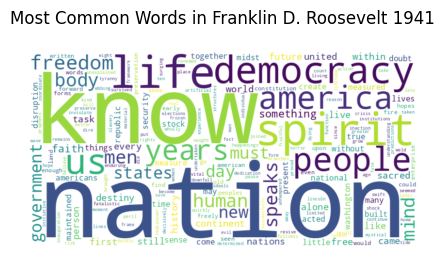

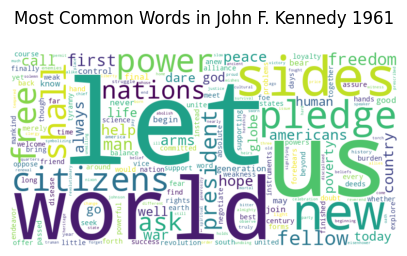

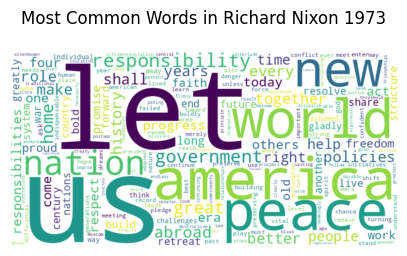

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

from nltk.tokenize import word_tokenize

# Define the specific speeches to analyze
speeches_to_analyze = {
    'Franklin D. Roosevelt 1941': inaugural.raw('1941-Roosevelt.txt'),
    'John F. Kennedy 1961': inaugural.raw('1961-Kennedy.txt'),
    'Richard Nixon 1973': inaugural.raw('1973-Nixon.txt')
}

# Define a preprocessing function
def preprocess_speech(speech):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(speech)
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return words

# Generate and display a word cloud for each speech
for title, speech in speeches_to_analyze.items():
    # Process the speech
    words = preprocess_speech(speech)

    # Count the frequency of each word
    word_freq = Counter(words)

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    # Display the word cloud
    plt.figure(figsize=(5, 3))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Most Common Words in {title}\n")
    plt.show()
